In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import output
output.enable_custom_widget_manager()

In [4]:
from google.colab import output
output.disable_custom_widget_manager()

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# About the dataset
### Expresso Churn Prediction Challenge

Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

## Short Description of features:
- user_id: Unique anonymized id of customer
- region: location of client
- tenure: duration in the network
- montant: top-up amount
- frequence-rech: number of times the customer refilled
- revenue: monthly income of each client
- arpu_segment: average income for last 3 months
- frequence: number of times the client has made an income
- data_volume: number of connections
- regularity: number of activities for last 3 months
- top_pack: most popular pack of user
- freq_top_pack: number of activations for top pack of user
- churn: dependent variable

In [6]:
train = pd.read_csv('/content/drive/MyDrive/Train.csv')
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [7]:
test = pd.read_csv('/content/drive/MyDrive/Test.csv')
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [8]:
sample = pd.read_csv('/content/drive/MyDrive/SampleSubmission.csv')
sample.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


__Sizes of the dataframes.__

In [9]:
print(train.shape)
print(test.shape)
print(sample.shape)

(2154048, 19)
(380127, 18)
(380127, 2)


Change column names to lowercase.

In [10]:
train = train.rename(columns=str.lower)
test = test.rename(columns=str.lower)
sample = sample.rename(columns=str.lower)

In [11]:
sample.churn.value_counts()

0    380127
Name: churn, dtype: int64

As we can see from the above, in 'sample' dataset all of the values for churn is 0. If all the target values in our test dataset will be 0, that wouldn't make any sense. That is why, we need to merge all these dataframes. Merge will be done by 'user_id'.

In [12]:
df1 = pd.merge(test, sample, on="user_id")
df1.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN,0


Concatenate two tables.

In [13]:
frames = [train, df1]
data = pd.concat(frames)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,churn
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


Sizes of our final dataset.

In [14]:
data.shape

(2534175, 19)

Checking for null values in the dataset.

In [15]:
data.isnull().sum()

user_id                 0
region             999027
tenure                  0
montant            889794
frequence_rech     889794
revenue            853421
arpu_segment       853421
frequence          853421
data_volume       1247473
on_net             925189
orange            1052478
tigo              1517017
zone1             2334593
zone2             2373275
mrg                     0
regularity              0
top_pack          1061373
freq_top_pack     1061373
churn                   0
dtype: int64

## Checking for Imbalance

In [25]:
data.churn.value_counts()

0    2130189
1     403986
Name: churn, dtype: int64

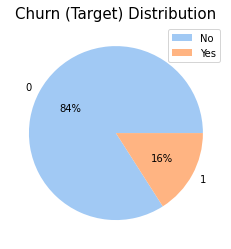

In [26]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

## Missing values

In [27]:
# Features with missing values
missing = data.isnull().sum().sort_values(ascending = False).head(20)
miss_percent = (missing/len(data))*100

# Percentage of missing values
pd.DataFrame({'missing values number': missing, '% of missing data': miss_percent.values})

,missing values number,% of missing data
zone2,2373275,93.650794
zone1,2334593,92.124380
tigo,1517017,59.862362
data_volume,1247473,49.226001
freq_top_pack,1061373,41.882388
top_pack,1061373,41.882388
orange,1052478,41.531386
region,999027,39.422179
on_net,925189,36.508489
montant,889794,35.111782


Installing 'missingno' package.<br>
__missingno__ - missing data visualization module for Python.

In [28]:
# pip install missingno

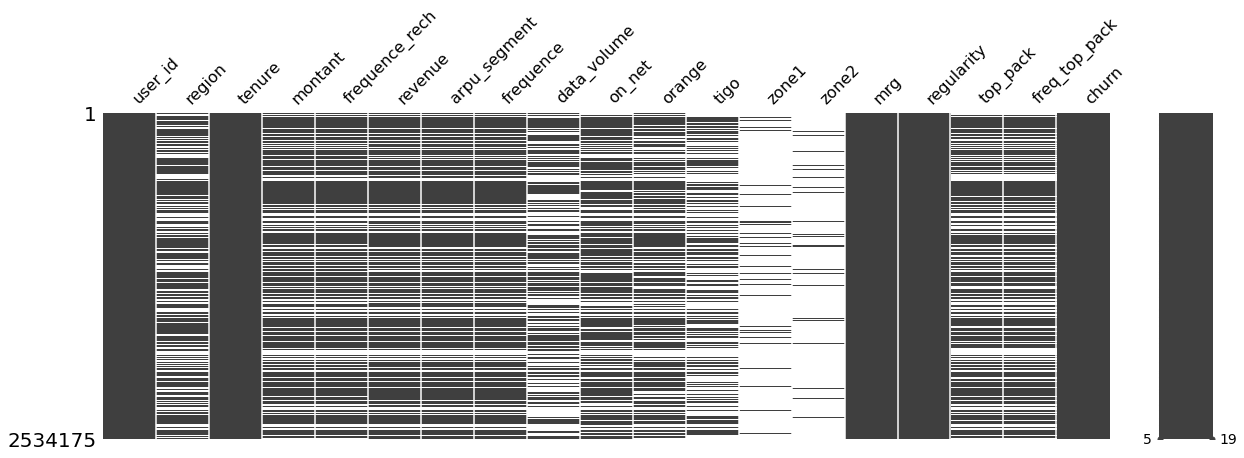

In [29]:
import missingno as mno

mno.matrix(data, figsize = (20, 6))

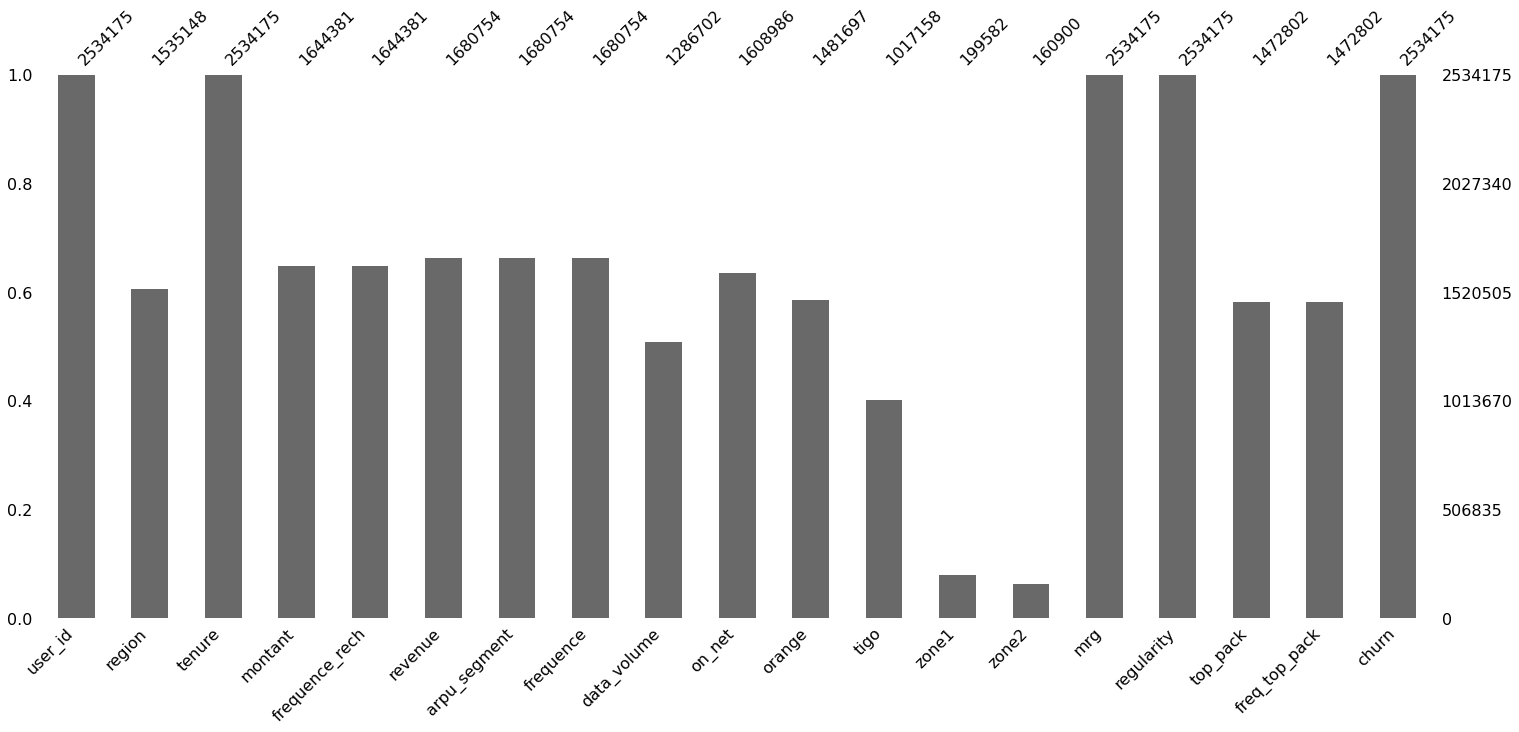

In [30]:
mno.bar(data)

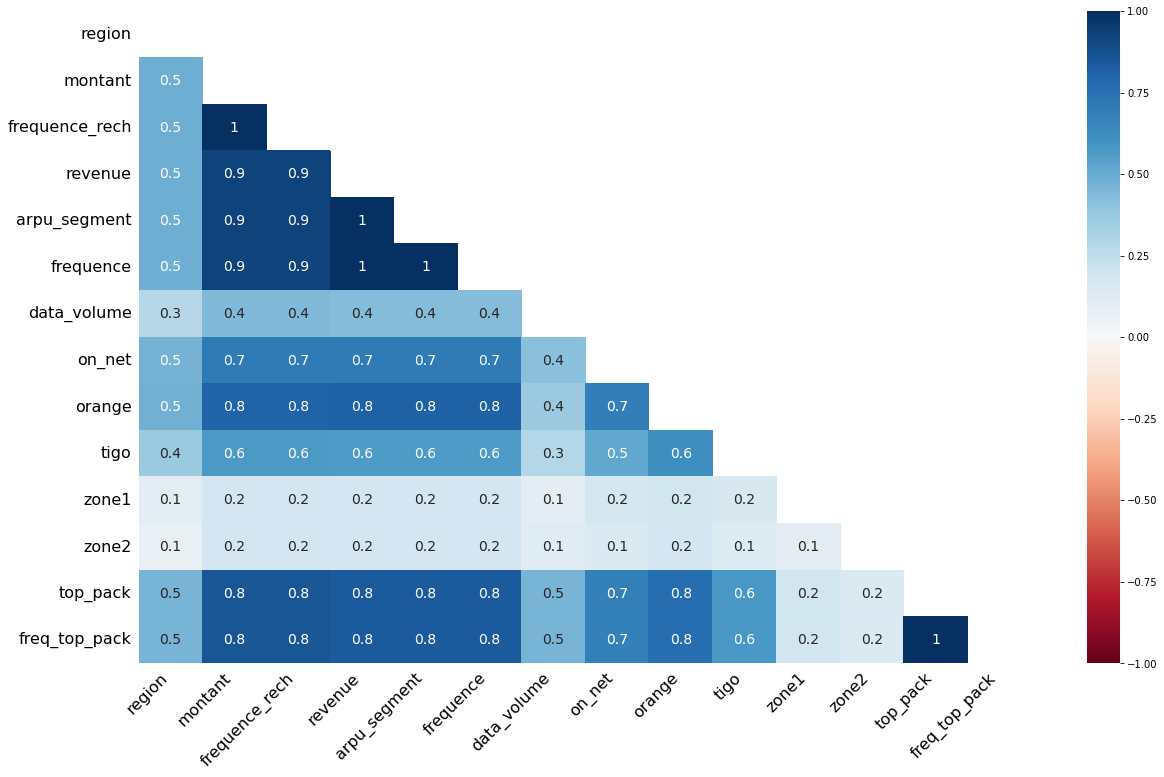

In [31]:
mno.heatmap(data)

The __heatmap function__ shows that there are strong correlations between missing values of different features. <br>
Low correlations indicate that the data are MAR(Missing at random).

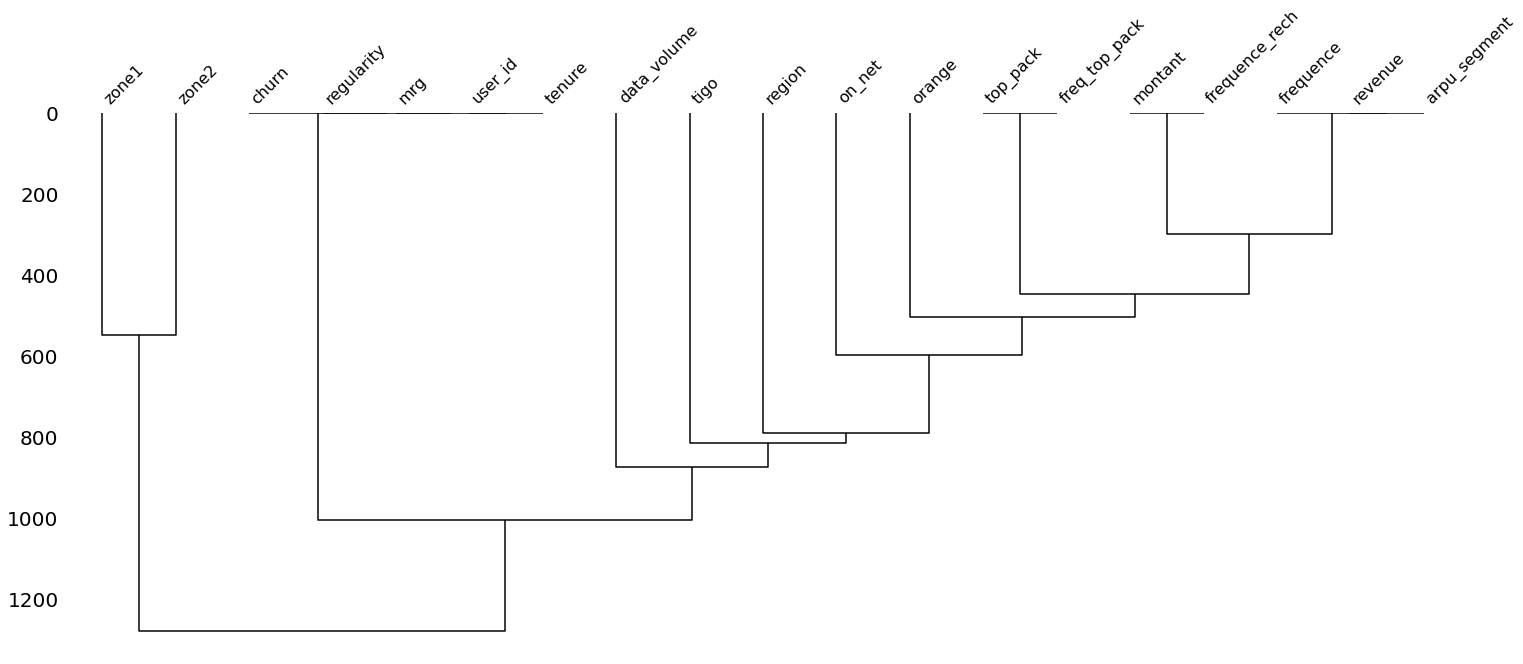

In [32]:
mno.dendrogram(data)

- Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)
- The missingness of __'on_net'__ tends to be more similar to __'orange'__ than to __'region'__ and so on. 

In [33]:
# dropping these 3 columns, because absense in these columns is correlated with absense in other columns
data.dropna(subset=['arpu_segment', 'revenue', 'frequence'], how = 'all', inplace=True)
data.shape

(1680754, 19)

In [34]:
data.isnull().sum()

user_id                 0
region             376770
tenure                  0
montant             62467
frequence_rech      62467
revenue                 0
arpu_segment            0
frequence               0
data_volume        566680
on_net             204695
orange             216149
tigo               671367
zone1             1488440
zone2             1520352
mrg                     0
regularity              0
top_pack           208033
freq_top_pack      208033
churn                   0
dtype: int64

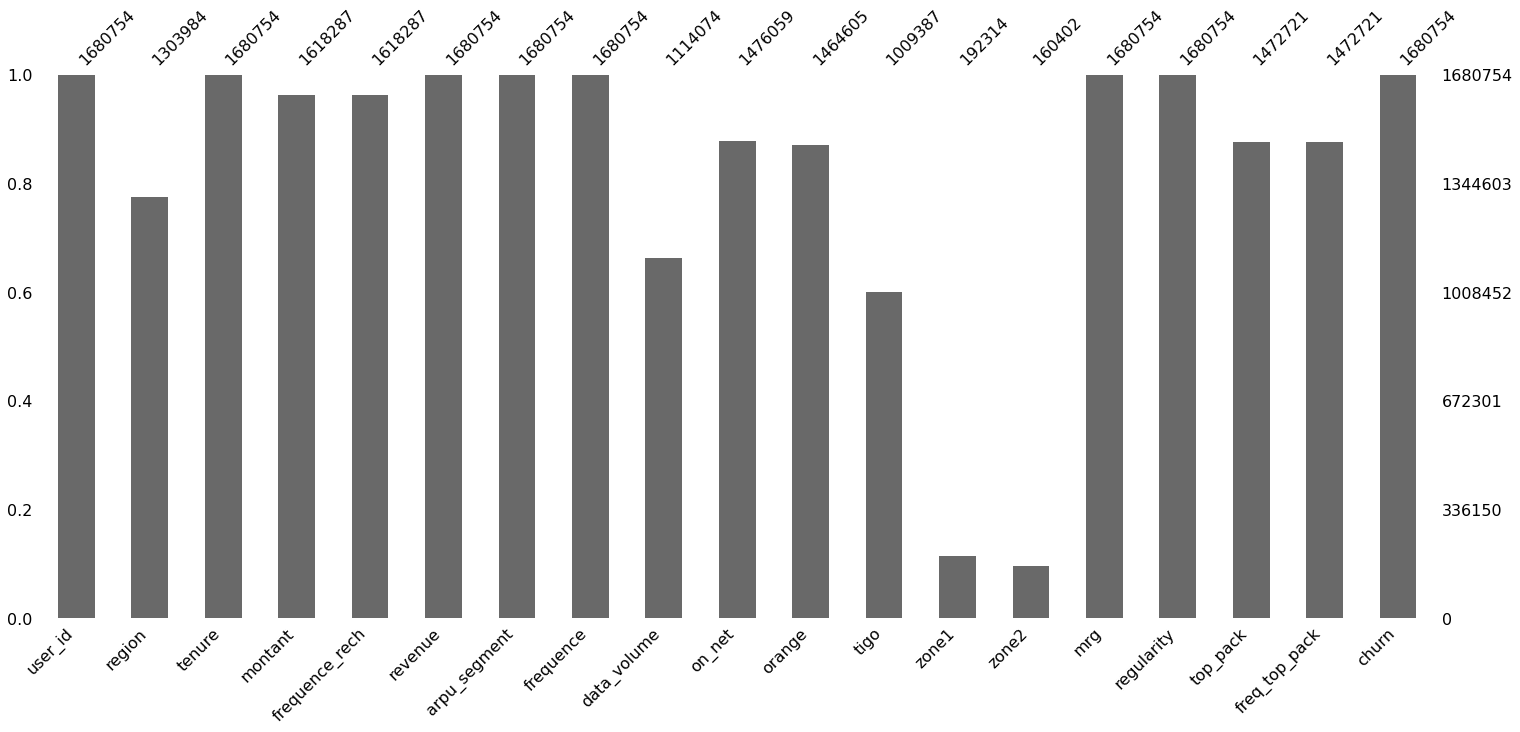

In [35]:
mno.bar(data)

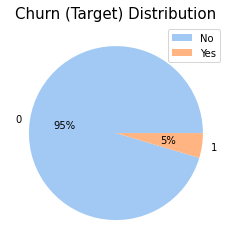

0    1603561
1      77193
Name: churn, dtype: int64


In [36]:
size = data.churn.value_counts()
labels = data.churn.value_counts().index
label=['No', 'Yes']
y = np.array(size)

colors = sns.color_palette('pastel')[0:2]
plt.pie(size, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(label)
plt.title('Churn (Target) Distribution', fontsize=15)
plt.show()

print(data.churn.value_counts())

__Comment:__ As you can see, the target imbalance percentages has changed.

Percentages of missing values in 'zone1' and 'zone2' columns are greater than __90%.__ For that reason, we can drop those columns.<br>
Also 'user_id' column can be dropped, because it doesn't hold any crucial information, however we will use it later to merge tables.

In [37]:
data.drop(columns=['zone1', 'zone2'], axis=1, inplace=True)

## Correlation with other columns

In [39]:
data.corr()

,montant,frequence_rech,revenue,arpu_segment,frequence,data_volume,on_net,orange,tigo,regularity,freq_top_pack,churn
montant,1.000000,0.790971,0.977077,0.977077,0.775424,0.300683,0.326491,0.658026,0.412533,0.518499,0.741025,-0.086068
frequence_rech,0.790971,1.000000,0.799879,0.799878,0.956089,0.152658,0.404968,0.518861,0.342987,0.552838,0.868894,-0.102603
revenue,0.977077,0.799879,1.000000,1.000000,0.785456,0.306957,0.331883,0.660904,0.412403,0.532010,0.750907,-0.104635
arpu_segment,0.977077,0.799878,1.000000,1.000000,0.785455,0.306957,0.331883,0.660905,0.412403,0.532008,0.750907,-0.104635
frequence,0.775424,0.956089,0.785456,0.785455,1.000000,0.169376,0.395269,0.471795,0.307009,0.591286,0.844751,-0.127918
data_volume,0.300683,0.152658,0.306957,0.306957,0.169376,1.000000,-0.023181,0.062469,0.022963,0.176390,0.118645,-0.010926
on_net,0.326491,0.404968,0.331883,0.331883,0.395269,-0.023181,1.000000,0.221391,0.137290,0.261084,0.356398,-0.042981
orange,0.658026,0.518861,0.660904,0.660905,0.471795,0.062469,0.221391,1.000000,0.405083,0.308927,0.553588,-0.057707
tigo,0.412533,0.342987,0.412403,0.412403,0.307009,0.022963,0.137290,0.405083,1.000000,0.193038,0.369002,-0.032287
regularity,0.518499,0.552838,0.532010,0.532008,0.591286,0.176390,0.261084,0.308927,0.193038,1.000000,0.446004,-0.278262


**'revenue'** and **'arpu_segment'** columns correlation is 1, that is why I can drop one of them.

In [40]:
data.drop(columns=['arpu_segment'], axis=1, inplace=True)

Get Correlation of "churn" column with other variables.

In [41]:
c = data.corr()['churn'].abs()
sc = c.sort_values()
a = dict(sc.tail(40))
b = a.keys()

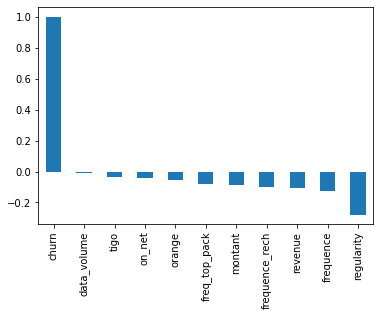

In [42]:
data[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar');

The greatest correlation between target variable and __'regularity'__ column. The followings are 'frequence', 'revenue', 'frequence_rech' and so on.

Number of unique values in each column of the dataset.

In [43]:
data.nunique()

user_id           1680754
region                 14
tenure                  8
montant              7223
frequence_rech        126
revenue             39742
frequence              91
data_volume         43850
on_net              10320
orange               3283
tigo                 1376
mrg                     1
regularity             62
top_pack              142
freq_top_pack         257
churn                   2
dtype: int64

We can drop __'mrg'__ column because there is only one unique value.

In [44]:
data.drop(columns=['mrg'], axis=1, inplace=True)
data.shape

(1680754, 15)

## Outliers

In [46]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

Number of all outliers in each column.

In [47]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

churn              77193
data_volume       125949
freq_top_pack     107444
frequence          82171
frequence_rech    107672
montant            98102
on_net            213080
orange            153785
region                 0
regularity             0
revenue           107281
tenure                 0
tigo              117245
top_pack               0
user_id                0
dtype: int64

Dropping outliers from the columns in the list below.

In [48]:
cols = ['data_volume', 'freq_top_pack', 'frequence', 'frequence_rech', 'montant', 'on_net', 'orange', 'tigo'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [49]:
# 1680754, 15 - our previous size of the dataset
data.shape

(1209381, 15)

## Filling Missing values
### Multivariate feature imputation

A more sophisticated [approach](https://scikit-learn.org/stable/modules/impute.html) is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

__Note__ This estimator is still experimental for now: default parameters or details of behaviour might change without any deprecation cycle. 

In [50]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["tenure1"] = ord_enc.fit_transform(data[["tenure"]])
data[["tenure1", "tenure"]].head(10)

,tenure1,tenure
0,7.0,K > 24 month
2,7.0,K > 24 month
4,7.0,K > 24 month
8,7.0,K > 24 month
11,7.0,K > 24 month
13,7.0,K > 24 month
14,7.0,K > 24 month
15,7.0,K > 24 month
25,7.0,K > 24 month
29,7.0,K > 24 month


### 'frequence_rech' and 'montant' columns

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [52]:
cols = ['tenure1', 'regularity', 'frequence', 'revenue', 'frequence_rech', 'montant']
X = data[cols]
X

,tenure1,regularity,frequence,revenue,frequence_rech,montant
0,7.0,54,17.0,4251.0,15.0,4250.0
2,7.0,17,2.0,1020.0,2.0,3600.0
4,7.0,11,1.0,985.0,1.0,1000.0
8,7.0,31,12.0,1502.0,3.0,1500.0
11,7.0,62,36.0,11870.0,27.0,12650.0
...,...,...,...,...,...,...
380114,7.0,20,10.0,1211.0,7.0,1600.0
380118,4.0,4,2.0,991.0,2.0,1000.0
380120,7.0,52,7.0,3299.0,7.0,3300.0
380124,7.0,15,10.0,3949.0,7.0,3950.0


In [53]:
impute_it = IterativeImputer(max_iter=10, random_state=42)
impute_it = impute_it.fit_transform(X)
k = pd.DataFrame(impute_it, columns=cols)
k.head()

,tenure1,regularity,frequence,revenue,frequence_rech,montant
0,7.0,54.0,17.0,4251.0,15.0,4250.0
1,7.0,17.0,2.0,1020.0,2.0,3600.0
2,7.0,11.0,1.0,985.0,1.0,1000.0
3,7.0,31.0,12.0,1502.0,3.0,1500.0
4,7.0,62.0,36.0,11870.0,27.0,12650.0


Renaming columns because later when we merge them with 'data' dataframe, problems won't appear.

In [54]:
k = k.rename({'frequence_rech': 'frequence_rech1'}, axis=1)
k = k.rename({'montant': 'montant1'}, axis=1)
data.head()

,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,12.0,NaN,2.0,53.0,2.0,31,NaN,NaN,0,7.0
11,00005b7c61f811e4eef1a05903a4b700afd23e46,KAOLACK,K > 24 month,12650.0,27.0,11870.0,36.0,8453.0,431.0,66.0,6.0,62,On net 200F=Unlimited _call24H,11.0,0,7.0


In [55]:
# reset indexes in the dataframe
data.reset_index(inplace=True)
data.head()

,index,user_id,region,tenure,montant,frequence_rech,revenue,frequence,data_volume,on_net,orange,tigo,regularity,top_pack,freq_top_pack,churn,tenure1
0,0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,On net 200F=Unlimited _call24H,8.0,0,7.0
1,2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,On-net 1000F=10MilF;10d,1.0,0,7.0
2,4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,7.0
3,8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,12.0,NaN,2.0,53.0,2.0,31,NaN,NaN,0,7.0
4,11,00005b7c61f811e4eef1a05903a4b700afd23e46,KAOLACK,K > 24 month,12650.0,27.0,11870.0,36.0,8453.0,431.0,66.0,6.0,62,On net 200F=Unlimited _call24H,11.0,0,7.0


In [56]:
data.drop(columns=['index'], inplace=True)

In [57]:
extracted_col = k[["frequence_rech1", 'montant1']]
data = pd.merge(data, extracted_col, how = 'left', left_index = True, right_index = True)

In [58]:
data.drop(columns=['frequence_rech', 'montant'], inplace=True)

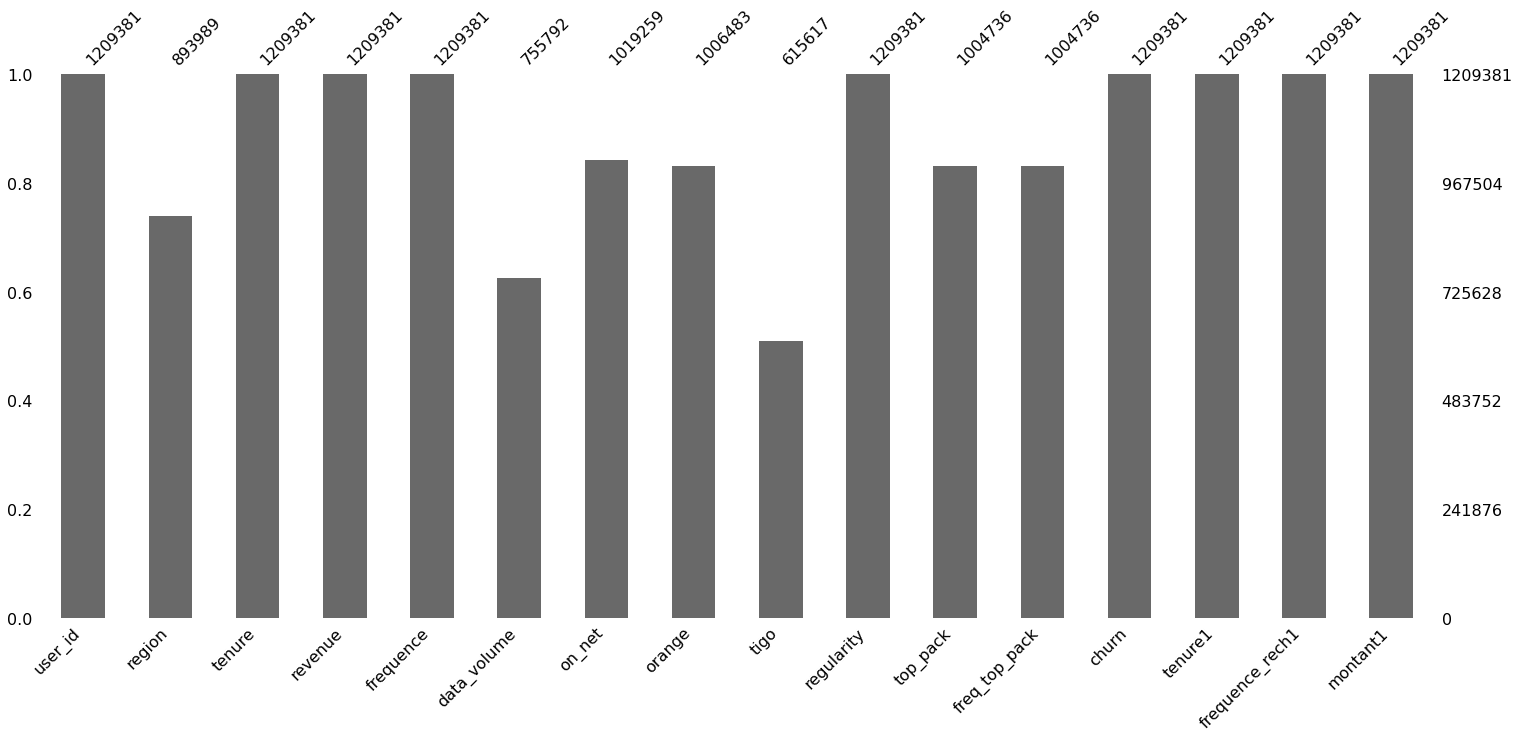

In [59]:
mno.bar(data)

In [60]:
data['top_pack']=data['top_pack'].factorize()[0]
# -1 is nan values in 'top_pack'
data['top_pack'].replace({-1: np.nan }, inplace=True)

### 'top_pack' and 'freq_top_pack' columns

In [61]:
cols = ['regularity', 'frequence', 'top_pack', 'freq_top_pack']
X2 = data[cols]

In [62]:
impute_it2 = IterativeImputer(max_iter=10, random_state=42)
impute_it2 = impute_it2.fit_transform(X2)
m = pd.DataFrame(impute_it2, columns=cols)
m.rename({'top_pack': 'top_pack1'}, axis=1, inplace=True)
m.rename({'freq_top_pack': 'freq_top_pack1'}, axis=1, inplace=True)
m

,regularity,frequence,top_pack1,freq_top_pack1
0,54.0,17.0,0.000000,8.000000
1,17.0,2.0,1.000000,1.000000
2,11.0,1.0,2.000000,2.000000
3,31.0,12.0,7.628829,5.832477
4,62.0,36.0,0.000000,11.000000
...,...,...,...,...
1209376,20.0,10.0,2.000000,2.000000
1209377,4.0,2.0,6.000000,2.000000
1209378,52.0,7.0,3.000000,4.000000
1209379,15.0,10.0,24.000000,6.000000


In [64]:
extracted_col = m[["top_pack1", 'freq_top_pack1']]
data = pd.merge(data, extracted_col, how = 'left', left_index = True, right_index = True)

In [65]:
data.drop(columns=['top_pack', 'freq_top_pack'], axis=1, inplace=True)
data.isnull().sum()

user_id                 0
region             315392
tenure                  0
revenue                 0
frequence               0
data_volume        453589
on_net             190122
orange             202898
tigo               593764
regularity              0
churn                   0
tenure1                 0
frequence_rech1         0
montant1                0
top_pack1               0
freq_top_pack1          0
dtype: int64

In [66]:
data.drop(columns=['user_id', 'tenure'], inplace=True)

## 'data_volume' column

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()
list1=['tigo', 'data_volume', 'on_net', 'orange', 'region', 'churn']
testdf = data[data['data_volume'].isnull()==True]
traindf = data[data['data_volume'].isnull()==False]
y = traindf['data_volume']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['data_volume']= pred

In [69]:
df_out = pd.merge(traindf,y,how = 'left',left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
data = pd.merge(data,result['data_volume'], how = 'left',left_index = True, right_index = True) 
data

,region,revenue,frequence,data_volume_x,on_net,orange,tigo,regularity,churn,tenure1,frequence_rech1,montant1,top_pack1,freq_top_pack1,data_volume_y
0,FATICK,4251.0,17.0,4.0,388.0,46.0,1.0,54,0,7.0,15.0,4250.0,0.000000,8.000000,4.000000
1,NaN,1020.0,2.0,NaN,90.0,46.0,7.0,17,0,7.0,2.0,3600.0,1.000000,1.000000,439.918149
2,DAKAR,985.0,1.0,NaN,39.0,24.0,NaN,11,0,7.0,1.0,1000.0,2.000000,2.000000,443.580494
3,DAKAR,1502.0,12.0,NaN,2.0,53.0,2.0,31,0,7.0,3.0,1500.0,7.628829,5.832477,1267.318209
4,KAOLACK,11870.0,36.0,8453.0,431.0,66.0,6.0,62,0,7.0,27.0,12650.0,0.000000,11.000000,8453.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209376,DAKAR,1211.0,10.0,170.0,6.0,21.0,1.0,20,0,7.0,7.0,1600.0,2.000000,2.000000,170.000000
1209377,NaN,991.0,2.0,1507.0,NaN,0.0,NaN,4,0,4.0,2.0,1000.0,6.000000,2.000000,1507.000000
1209378,SAINT-LOUIS,3299.0,7.0,NaN,80.0,80.0,NaN,52,0,7.0,7.0,3300.0,3.000000,4.000000,1474.405402
1209379,NaN,3949.0,10.0,1724.0,25.0,71.0,NaN,15,0,7.0,7.0,3950.0,24.000000,6.000000,1724.000000


In [70]:
data.drop('data_volume_x', axis=1, inplace=True)

## 'on_net' column

In [71]:
lr = LinearRegression()
list1=['on_net', 'orange', 'tigo', 'region', 'churn']
testdf = data[data['on_net'].isnull()==True]
traindf = data[data['on_net'].isnull()==False]
y = traindf['on_net']
traindf.drop(columns=list1,axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(columns=list1,axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['on_net']= pred

In [72]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1

In [73]:
frames = [df_out, testdf]
result = pd.concat(frames)
data = pd.merge(data, result['on_net'], how = 'left',left_index = True, right_index = True) 

In [74]:
data.drop('on_net_x', axis=1, inplace=True)

## 'tigo' column

In [75]:
cols = ['revenue', 'tenure1', 'regularity', 'frequence', 'tigo']
X3 = data[cols]

impute_it3 = IterativeImputer(max_iter=10, random_state=42)
impute_it3 = impute_it3.fit_transform(X3)
m = pd.DataFrame(impute_it3, columns=cols)

In [76]:
data = pd.merge(data, m['tigo'], how = 'left', left_index = True, right_index = True)
data.drop('tigo_x', axis=1, inplace=True)

Since initially the type of __'tigo'__ column was integer, I convert it from float to integer type.

In [77]:
data['tigo_y'] = data['tigo_y'].astype('int')

## 'region' column

In [78]:
# factorizing values in 'region' column
data['region']=data['region'].factorize()[0]
# replace -1 with NaN value
data['region'] = data['region'].replace(-1, np.nan)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
neigh = KNeighborsClassifier(n_neighbors=3)
list1=['orange', 'region', 'churn']
testdf1 = data[data['region'].isnull()==True]
traindf1 = data[data['region'].isnull()==False]
y = traindf1['region']
traindf1.drop(columns=list1,axis=1,inplace=True)
neigh.fit(traindf1,y)
testdf1.drop(columns=list1,axis=1,inplace=True)
pred = neigh.predict(testdf1)
testdf1['region']= pred

In [81]:
df_out = pd.merge(traindf1, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf1]
result = pd.concat(frames)
data = pd.merge(data,result['region'], how = 'left',left_index = True, right_index = True) 

In [82]:
data.drop('region_x', axis=1, inplace=True)

## "orange" column

In [83]:
data.orange.value_counts()

1.0      70405
0.0      63164
2.0      50781
3.0      36669
4.0      34690
         ...  
230.0      388
227.0      385
237.0      383
236.0      367
238.0      355
Name: orange, Length: 239, dtype: int64

In [84]:
data.orange.nunique()

239

In [85]:
lr = LinearRegression()
testdf = data[data['orange'].isnull()==True]
traindf = data[data['orange'].isnull()==False]
y = traindf['orange']
traindf.drop(['orange', 'churn'],axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop(['orange', 'churn'],axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['orange']= pred

In [86]:
df_out = pd.merge(traindf, y, how = 'left', left_index = True, right_index = True) # rename to traindf1
frames = [df_out, testdf]
result = pd.concat(frames)
data = pd.merge(data, result['orange'], how = 'left',left_index = True, right_index = True) 

In [87]:
data.drop('orange_x', axis=1, inplace=True)

In [88]:
data.isnull().sum()

revenue            0
frequence          0
regularity         0
churn              0
tenure1            0
frequence_rech1    0
montant1           0
top_pack1          0
freq_top_pack1     0
data_volume_y      0
on_net_y           0
tigo_y             0
region_y           0
orange_y           0
dtype: int64

## Algorithms which handle missing values
Some algprithms like XGBoost and LightGBM can handle missing values without any preprocessing, by supplying relevant parameters.

- #### XGBoost

- #### LightGBm

## XGBoost

In [89]:
pip install xgboost

In [90]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
X = data.drop('churn', axis=1)
Y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [92]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: ",  accuracy)

Accuracy:  0.9426378615671417


We can see 94.27% accuracy, we are getting very high accuracy because it is predicting mostly the majority class. That is why, there is a necessity to deal with imbalance in our dataset.

## Dealing with imbalance
[Dealing with an imbalance](https://www.kaggle.com/code/prasathm2001/undersampling-in-wine-quality)

### Undersampling method
__Undersampling__ - downsize the majority class to balance with the minority class.

- **Simple random undersampling:** the basic approach of random sampling from the majority class.
- **Undersampling using K-Means:** synthesize based on the cluster centroids.
- **Undersampling using Tomek links**: detects and removes samples from Tomek links

https://www.justintodata.com/imbalanced-data-machine-learning-classification/

In [93]:
from sklearn.model_selection import train_test_split

Converting all column types into integer, because it will be easier to work with models later.

In [94]:
data=data.astype('int32')
data.dtypes

revenue            int32
frequence          int32
regularity         int32
churn              int32
tenure1            int32
frequence_rech1    int32
montant1           int32
top_pack1          int32
freq_top_pack1     int32
data_volume_y      int32
on_net_y           int32
tigo_y             int32
region_y           int32
orange_y           int32
dtype: object

In [95]:
X = data.drop(columns=['churn'], axis=1)
Y = data.churn

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Undersampling

Undersample method suits the best because, we have got too many observations.

In [97]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)
y_train.value_counts()

0    47341
1    47341
Name: churn, dtype: int64

# Models

### Linear Models:
 
- Logistic Regression
- Support Vector Machines

 

### Non-linear Models:
    
- K-Nearest Neighbours
- Kernel SVM
- Naïve Bayes
- Decision Tree Classification
- Random Forest Classification

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


def modeling1(alg, params={}):
    # Instantiating the algorithm class and unpacking parameters if any
    model = alg(**params) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred) )
    
    def print_scores(alg, y_true, y_pred):
        print(F'Accuracy:',accuracy_score(y_true, y_pred))
        print(F'Precision:', precision_score(y_true, y_pred))
        print(F'Recall:', recall_score(y_true, y_pred))
        print(F'F1 Score:', f1_score(y_true, y_pred))
    print_scores(alg, y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    # Create the Confusion Matrix Display Object(cmd_obj). 
    print('Confusion matrix:')
    print(cm)
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    # The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    # Use the Axes attribute 'ax_' to get to the underlying Axes object.
    # The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    # Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.show()
    
    return model

Standartizing features in the dataset.

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    375651
           1       0.16      0.83      0.27     23445

    accuracy                           0.73    399096
   macro avg       0.57      0.78      0.55    399096
weighted avg       0.94      0.73      0.80    399096

Accuracy: 0.7316109407260408
Precision: 0.1582412914188615
Recall: 0.8261889528684154
F1 Score: 0.26560989489417425
Confusion matrix:
[[272613 103038]
 [  4075  19370]]


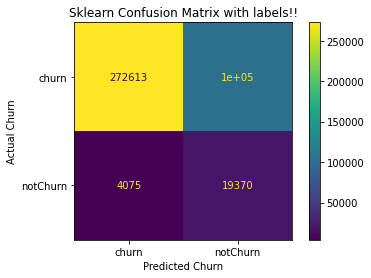

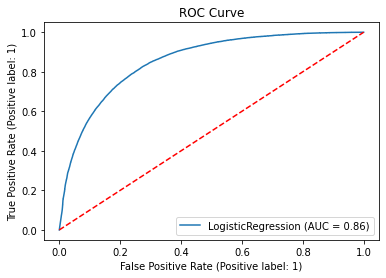

In [101]:
logreg = modeling1(LogisticRegression)

### Logistic Regression Hyperparameter tuning 

In [102]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters: ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.7762193816096044


In [103]:
logparams = {
    'C': 10.0, 
    'penalty': 'l2'
}

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    375651
           1       0.16      0.83      0.27     23445

    accuracy                           0.73    399096
   macro avg       0.57      0.78      0.55    399096
weighted avg       0.94      0.73      0.80    399096

Accuracy: 0.7316109407260408
Precision: 0.1582412914188615
Recall: 0.8261889528684154
F1 Score: 0.26560989489417425
Confusion matrix:
[[272613 103038]
 [  4075  19370]]


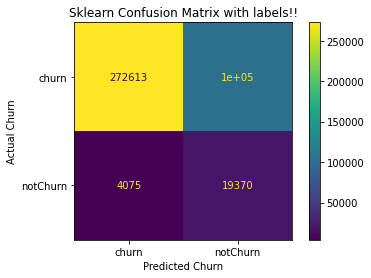

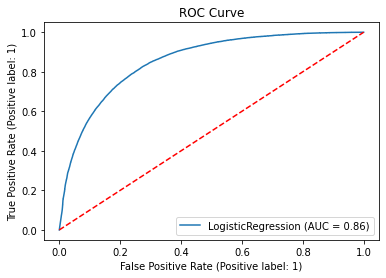

In [104]:
logcv=modeling1(LogisticRegression, params=logparams)

The performance of Logistic Regression after the gridsearch remained the same.

## Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.97      0.69      0.81    375651
           1       0.12      0.70      0.21     23445

    accuracy                           0.69    399096
   macro avg       0.55      0.70      0.51    399096
weighted avg       0.92      0.69      0.78    399096

Accuracy: 0.694619840840299
Precision: 0.12467302691284023
Recall: 0.6972915333759864
F1 Score: 0.2115260202365241
Confusion matrix:
[[260872 114779]
 [  7097  16348]]


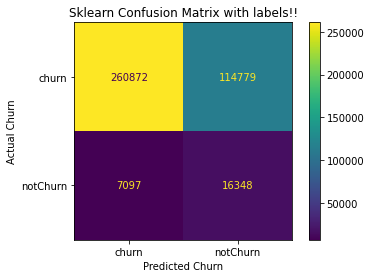

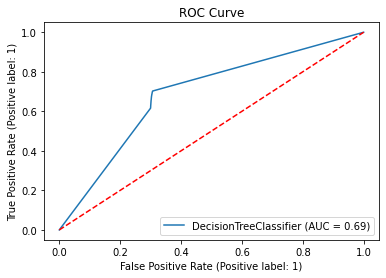

In [106]:
tree = modeling1(DecisionTreeClassifier)

### Decision Tree Hyperparameter tuning

In [107]:
tree_params = {"max_depth": range(1, 30), "max_features": range(1, 1207, 50)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 725 candidates, totalling 3625 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 30),
                         'max_features': range(1, 1207, 50)},
             verbose=True)

In [108]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 1}

In [109]:
params = {
    'max_depth': 5, 
    'max_features': 1
}

              precision    recall  f1-score   support

           0       0.98      0.73      0.84    375651
           1       0.16      0.79      0.26     23445

    accuracy                           0.74    399096
   macro avg       0.57      0.76      0.55    399096
weighted avg       0.93      0.74      0.81    399096

Accuracy: 0.736376711367691
Precision: 0.15589596835283226
Recall: 0.7900191938579655
F1 Score: 0.2604056096446522
Confusion matrix:
[[275363 100288]
 [  4923  18522]]


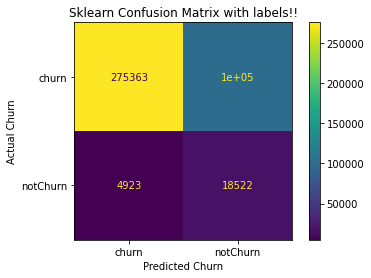

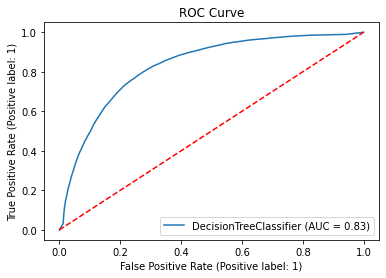

In [110]:
treecv=modeling1(DecisionTreeClassifier, params=params)

Decision tree performance after gridsearch upgraded significantly. AUC increased from 0.69 to 0.83, by14%.

## KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.98      0.74      0.84    375651
           1       0.15      0.72      0.25     23445

    accuracy                           0.74    399096
   macro avg       0.56      0.73      0.54    399096
weighted avg       0.93      0.74      0.81    399096

Accuracy: 0.7403557038907932
Precision: 0.148231020322207
Recall: 0.7205374280230327
F1 Score: 0.24587909088924303
Confusion matrix:
[[278580  97071]
 [  6552  16893]]


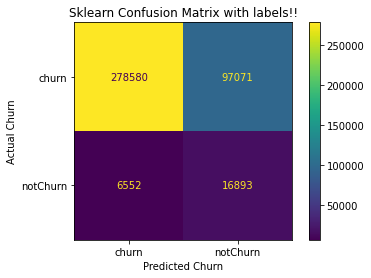

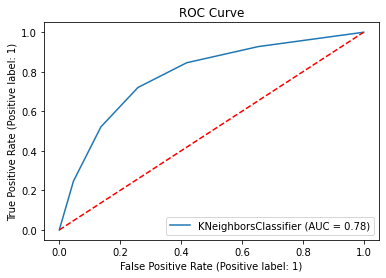

In [112]:
knn = modeling1(KNeighborsClassifier)

### KNN Hyperparameter tuning

In [113]:
knncv = KNeighborsClassifier()
k_range = list(range(1, 11, 2))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knncv, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
  
# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [114]:
grid_search.best_params_

{'n_neighbors': 9}

In [115]:
params1 = {
    'n_neighbors': 9
}

              precision    recall  f1-score   support

           0       0.98      0.75      0.85    375651
           1       0.16      0.75      0.26     23445

    accuracy                           0.75    399096
   macro avg       0.57      0.75      0.55    399096
weighted avg       0.93      0.75      0.81    399096

Accuracy: 0.747875197947361
Precision: 0.15613833417987721
Recall: 0.7473661761569631
F1 Score: 0.25831085165037665
Confusion matrix:
[[280952  94699]
 [  5923  17522]]


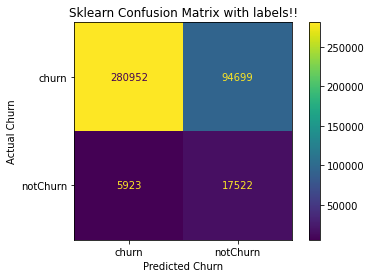

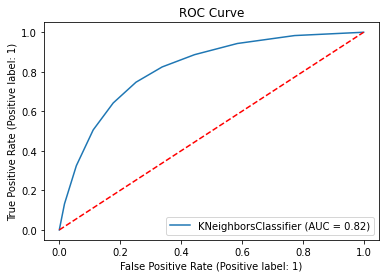

In [116]:
knn_cv = modeling1(KNeighborsClassifier, params=params1)

Hyperparameter tuning improved KNeighborsClassifier AUC performance from 0.78 to 0.82.

## Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    375651
           1       0.17      0.78      0.28     23445

    accuracy                           0.77    399096
   macro avg       0.58      0.77      0.57    399096
weighted avg       0.93      0.77      0.83    399096

Accuracy: 0.7692485016136469
Precision: 0.17375269706388358
Recall: 0.7796971635743228
F1 Score: 0.28417747100705776
Confusion matrix:
[[288724  86927]
 [  5165  18280]]


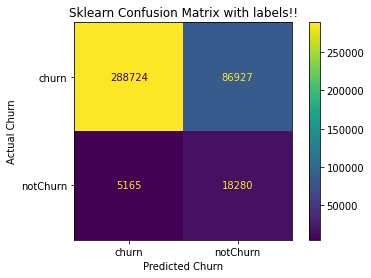

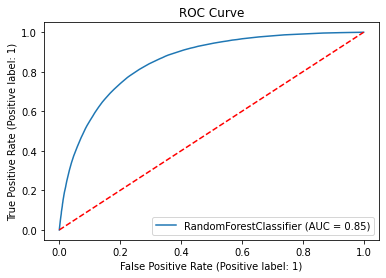

In [118]:
forest = modeling1(RandomForestClassifier)

### Random Forest Hyperparameter tuning

In [119]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

param_grid = { 
              'n_estimators': n_estimators, # Number of trees in random forest
               'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': [2,4], # Maximum number of levels in tree
               'min_samples_split': [2, 5], # Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2], # Minimum number of samples required at each leaf node
               'bootstrap': [True, False] # Method of selecting samples for training each tree
}

In [120]:
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [121]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 41}

In [122]:
rf_params = {
    'bootstrap': True,
    'max_depth': 4,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 41
}

              precision    recall  f1-score   support

           0       0.98      0.76      0.86    375651
           1       0.17      0.78      0.27     23445

    accuracy                           0.76    399096
   macro avg       0.57      0.77      0.56    399096
weighted avg       0.93      0.76      0.82    399096

Accuracy: 0.7583188004891054
Precision: 0.16676251768679537
Recall: 0.7791853273619108
F1 Score: 0.27472742311451986
Confusion matrix:
[[284374  91277]
 [  5177  18268]]


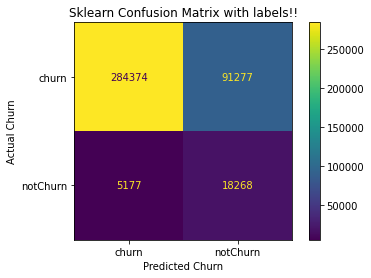

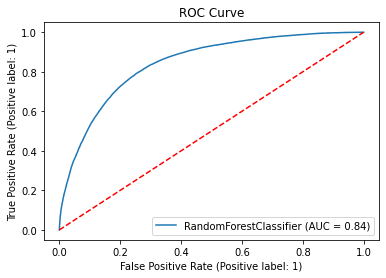

In [123]:
rf_cv = modeling1(RandomForestClassifier,params = rf_params)

As we can see from the above graph, AUC score decreased by 1%. In this case, gridsearch didn't help to increase the performance.

## XGBoost

              precision    recall  f1-score   support

           0       0.98      0.76      0.86    375651
           1       0.17      0.80      0.28     23445

    accuracy                           0.76    399096
   macro avg       0.58      0.78      0.57    399096
weighted avg       0.94      0.76      0.82    399096

Accuracy: 0.7624406157916892
Precision: 0.17291827081729183
Recall: 0.8046065259117082
F1 Score: 0.2846601326422056
Confusion matrix:
[[285423  90228]
 [  4581  18864]]


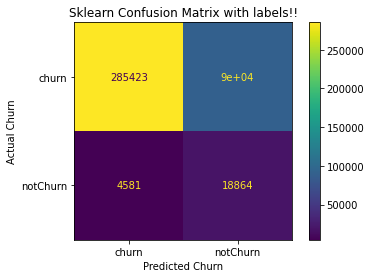

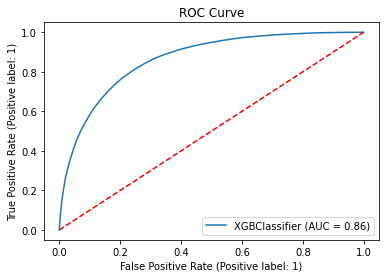

In [124]:
xgb = modeling1(XGBClassifier)

### XGBoost Hyperparameter tuning

In [128]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [129]:
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'roc_auc',n_jobs = 10,cv = 10,verbose=True)

In [130]:
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


KeyboardInterrupt: ignored

In [131]:
xgb_params = {
              'max_depth' : 4, 
              'n_estimators' : 180, 
              'nthread' : 4
}

              precision    recall  f1-score   support

           0       0.98      0.76      0.86    375651
           1       0.17      0.81      0.29     23445

    accuracy                           0.76    399096
   macro avg       0.58      0.78      0.57    399096
weighted avg       0.94      0.76      0.82    399096

Accuracy: 0.761731513219877
Precision: 0.1730448036361313
Recall: 0.8087012156110045
F1 Score: 0.2850870598141521
Confusion matrix:
[[285044  90607]
 [  4485  18960]]


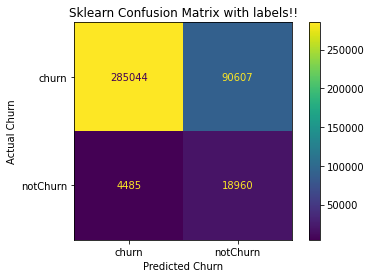

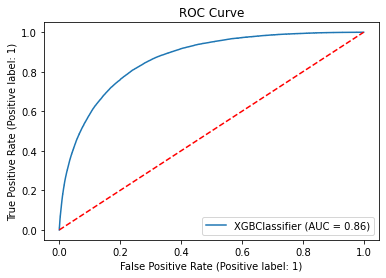

In [132]:
xgb_cv = modeling1(XGBClassifier,params = xgb_params)

The performance remained the same. However we suppose that the price of FP is more expensive rather than FN rate. After gridsearch the FP increased, while FN decreased.

## GaussianNB

In [133]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

           0       0.98      0.54      0.69    375651
           1       0.10      0.84      0.18     23445

    accuracy                           0.55    399096
   macro avg       0.54      0.69      0.44    399096
weighted avg       0.93      0.55      0.66    399096

Accuracy: 0.5547512377974222
Precision: 0.1021192517617441
Recall: 0.8443164853913414
F1 Score: 0.18220142024143185
Confusion matrix:
[[201604 174047]
 [  3650  19795]]


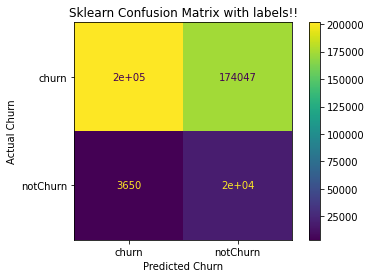

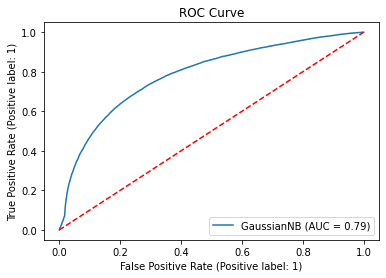

In [134]:
nb = modeling1(GaussianNB)

### Gaussian NB Hyperparameter Tuning

In [135]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid=params_NB, cv=5, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.0001232846739442066}

In [136]:
gs_params = {
    'var_smoothing': 0.0001232846739442066
}

              precision    recall  f1-score   support

           0       0.98      0.54      0.69    375651
           1       0.10      0.84      0.18     23445

    accuracy                           0.55    399096
   macro avg       0.54      0.69      0.44    399096
weighted avg       0.93      0.55      0.66    399096

Accuracy: 0.554726181169443
Precision: 0.1021139838639787
Recall: 0.8443164853913414
F1 Score: 0.18219303533872994
Confusion matrix:
[[201594 174057]
 [  3650  19795]]


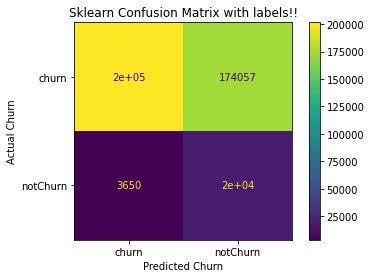

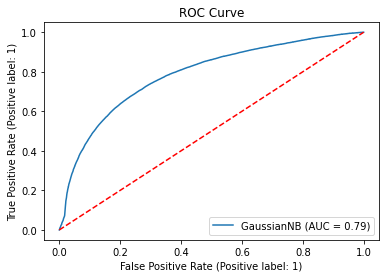

In [137]:
gs_cv = modeling1(GaussianNB, params=gs_params)

The AUC score of GaussianNB remained the same, while FP number increased by 10 after gridsearch.

## LightGBM

In [138]:
pip install lightgbm

In [139]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

              precision    recall  f1-score   support

           0       0.98      0.76      0.86    375651
           1       0.17      0.81      0.29     23445

    accuracy                           0.76    399096
   macro avg       0.58      0.78      0.57    399096
weighted avg       0.94      0.76      0.82    399096

Accuracy: 0.7627563293042275
Precision: 0.17345984598459846
Recall: 0.8070377479206654
F1 Score: 0.28554612337294855
Confusion matrix:
[[285492  90159]
 [  4524  18921]]


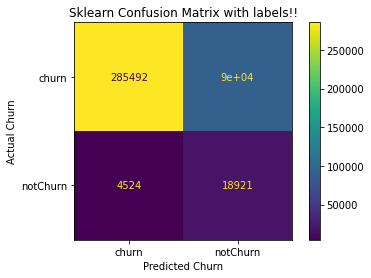

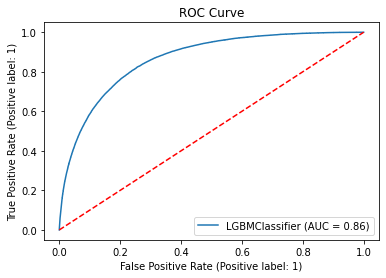

In [140]:
lgbm = modeling1(lgb.LGBMClassifier)

### LightGBM Hyperparameter tuning

In [141]:
lgbm_params = {
                 "n_estimators":[100, 200, 300],
                 "learning_rate":[0.01, 0.05, 0.1, 0.3],
                 "num_leaves": [20, 50, 80, 100]
}

In [142]:
lgbmc = LGBMClassifier(objective="binary")

grid_search = GridSearchCV(estimator=lgbmc, param_grid=lgbm_params,n_jobs=-1, cv=3,scoring='accuracy',error_score=0)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 300, 'num_leaves': 20}

In [143]:
lgbm_params = {
                'learning_rate': 0.05, 
                'n_estimators': 300, 
                'num_leaves': 20
}

              precision    recall  f1-score   support

           0       0.98      0.76      0.86    375651
           1       0.17      0.81      0.29     23445

    accuracy                           0.76    399096
   macro avg       0.58      0.78      0.57    399096
weighted avg       0.94      0.76      0.82    399096

Accuracy: 0.762743800990238
Precision: 0.17360748417127098
Recall: 0.8081467263808915
F1 Score: 0.2858155707411263
Confusion matrix:
[[285461  90190]
 [  4498  18947]]


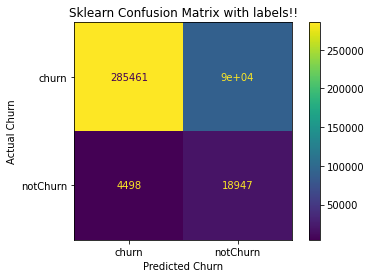

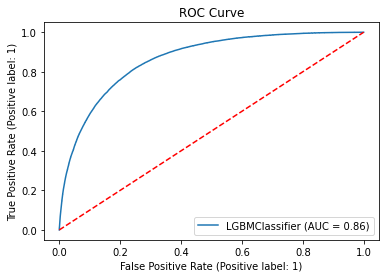

In [145]:
lgbm_cv = modeling1(LGBMClassifier,params = lgbm_params)

Performance remained the same. FP increased by 31.

## Linear Discriminant Analysis

In [146]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

              precision    recall  f1-score   support

           0       0.99      0.69      0.81    375651
           1       0.15      0.85      0.25     23445

    accuracy                           0.70    399096
   macro avg       0.57      0.77      0.53    399096
weighted avg       0.94      0.70      0.78    399096

Accuracy: 0.7027031090263997
Precision: 0.14784017518291376
Recall: 0.8523779057368309
F1 Score: 0.25197644655713725
Confusion matrix:
[[260462 115189]
 [  3461  19984]]


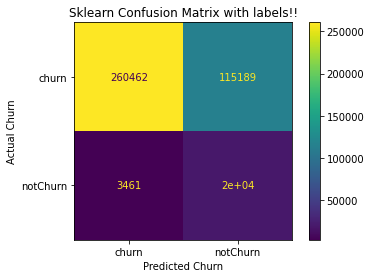

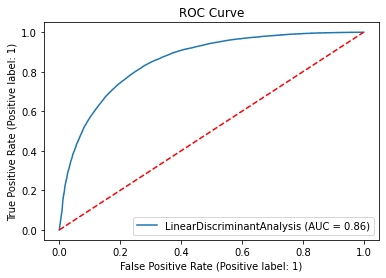

In [147]:
lda = modeling1(LDA)

### Linear Discriminant Analysis Hyperparameter tuning

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

Using the GridSearchCV class with a grid of different solver values.

In [149]:
model = LDA()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train, y_train)
print('best parameters: %s' % results.best_params_)

best parameters: {'solver': 'svd'}


In [150]:
lda_params ={
    'solver': 'svd'
}

              precision    recall  f1-score   support

           0       0.99      0.69      0.81    375651
           1       0.15      0.85      0.25     23445

    accuracy                           0.70    399096
   macro avg       0.57      0.77      0.53    399096
weighted avg       0.94      0.70      0.78    399096

Accuracy: 0.7027031090263997
Precision: 0.14784017518291376
Recall: 0.8523779057368309
F1 Score: 0.25197644655713725
Confusion matrix:
[[260462 115189]
 [  3461  19984]]


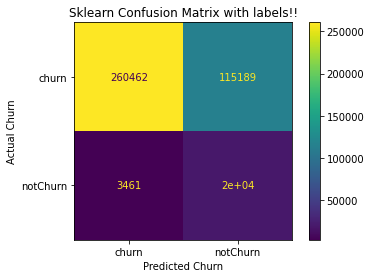

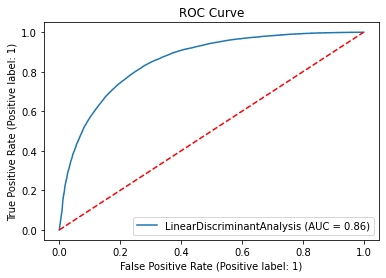

In [151]:
lda_cv = modeling1(LDA, params=lda_params)

Everything remained the same after the gridsearch even the confusion matrix.

## CatBoost Classifier


In [152]:
pip install catboost

     |████████████████████████████████| 76.6 MB 51 kB/s 


In [153]:
from catboost import CatBoostClassifier

Learning rate set to 0.071912
0:	learn: 0.6595193	total: 85.9ms	remaining: 1m 25s
1:	learn: 0.6310528	total: 141ms	remaining: 1m 10s
2:	learn: 0.6072619	total: 181ms	remaining: 1m
3:	learn: 0.5884011	total: 264ms	remaining: 1m 5s
4:	learn: 0.5708759	total: 324ms	remaining: 1m 4s
5:	learn: 0.5566317	total: 365ms	remaining: 1m
6:	learn: 0.5436411	total: 393ms	remaining: 55.8s
7:	learn: 0.5330154	total: 420ms	remaining: 52.1s
8:	learn: 0.5242580	total: 448ms	remaining: 49.3s
9:	learn: 0.5159927	total: 499ms	remaining: 49.4s
10:	learn: 0.5101362	total: 557ms	remaining: 50s
11:	learn: 0.5042198	total: 608ms	remaining: 50s
12:	learn: 0.4996329	total: 664ms	remaining: 50.4s
13:	learn: 0.4959030	total: 751ms	remaining: 52.9s
14:	learn: 0.4920674	total: 825ms	remaining: 54.2s
15:	learn: 0.4891040	total: 863ms	remaining: 53.1s
16:	learn: 0.4863548	total: 892ms	remaining: 51.6s
17:	learn: 0.4837560	total: 922ms	remaining: 50.3s
18:	learn: 0.4816542	total: 960ms	remaining: 49.5s
19:	learn: 0.48012

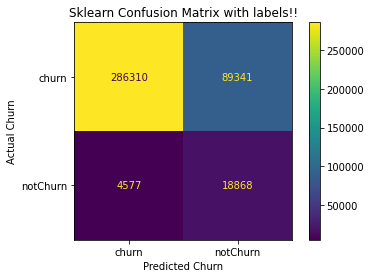

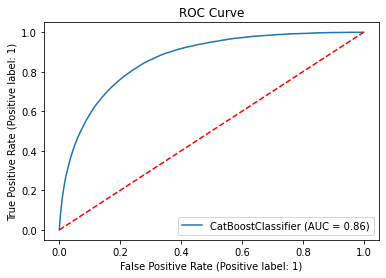

In [154]:
catb = modeling1(CatBoostClassifier)

### CatBoost Classifier Hyperparameter tuning

In [155]:
from sklearn.metrics import make_scorer, accuracy_score

In [156]:
clf = CatBoostClassifier()
params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'logging_level':['Silent'],
          'random_seed': [42]
         }
scorer = make_scorer(accuracy_score)
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring=scorer, cv=5)

In [157]:
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

{'depth': 6,
 'iterations': 500,
 'l2_leaf_reg': 1e-20,
 'leaf_estimation_iterations': 10,
 'logging_level': 'Silent',
 'loss_function': 'Logloss',
 'random_seed': 42}

In [158]:
cb_params = {
 'depth': 6,
 'iterations': 500,
 'l2_leaf_reg': 1e-20,
 'leaf_estimation_iterations': 10,
 'logging_level': 'Silent',
 'loss_function': 'Logloss',
 'random_seed': 42 
}

              precision    recall  f1-score   support

           0       0.98      0.76      0.86    375651
           1       0.17      0.80      0.29     23445

    accuracy                           0.77    399096
   macro avg       0.58      0.78      0.57    399096
weighted avg       0.94      0.77      0.83    399096

Accuracy: 0.7653772525908553
Precision: 0.17466350253995327
Recall: 0.8036681595222862
F1 Score: 0.28696095826257795
Confusion matrix:
[[286617  89034]
 [  4603  18842]]


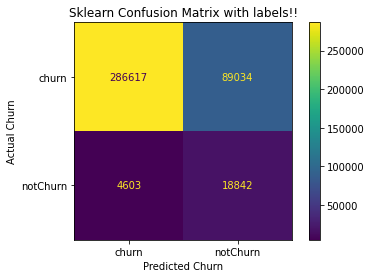

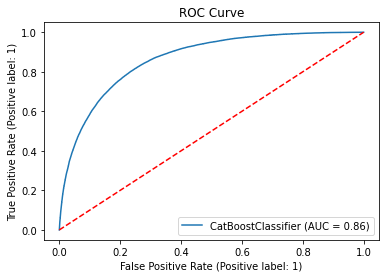

In [159]:
cb_cv =modeling1(CatBoostClassifier, params=cb_params)

AUC remained the same however the FP rate decreased by 307. As we assumed before FP rate is much more important for us rather than FN.

# Conclusion
### Depiction of Roc-Auc curve graphs altogether.

<Figure size 1080x360 with 0 Axes>

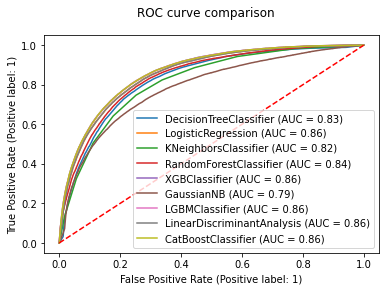

In [160]:
plt.figure(figsize=(15, 5))

fig = plot_roc_curve(treecv, X_test, y_test)
fig = plot_roc_curve(logcv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(knn_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(rf_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(xgb_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(gs_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(lgbm_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(lda_cv, X_test, y_test, ax = fig.ax_)
fig = plot_roc_curve(cb_cv, X_test, y_test, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Precision-Recall curves
The precision-recall curve shows the tradeoff between precision and recall for different threshold.

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Text(0.5, 1.0, 'Precision-Recall curve')

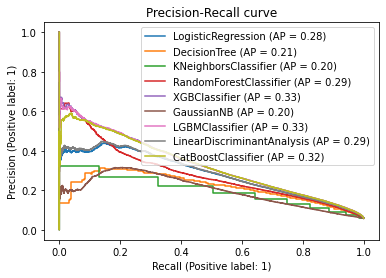

In [167]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(logcv, X_test, y_test, ax = plt.gca(),name = "LogisticRegression")
plot_precision_recall_curve(treecv, X_test, y_test, ax = plt.gca(),name = "DecisionTree")
plot_precision_recall_curve(knn_cv, X_test, y_test, ax = plt.gca(),name = "KNeighborsClassifier")
plot_precision_recall_curve(rf_cv, X_test, y_test, ax = plt.gca(),name = "RandomForestClassifier")
plot_precision_recall_curve(xgb_cv, X_test, y_test, ax = plt.gca(),name = "XGBClassifier")
plot_precision_recall_curve(gs_cv, X_test, y_test, ax = plt.gca(),name = "GaussianNB")
plot_precision_recall_curve(lgbm_cv, X_test, y_test, ax = plt.gca(),name = "LGBMClassifier")
plot_precision_recall_curve(lda_cv, X_test, y_test, ax = plt.gca(),name = "LinearDiscriminantAnalysis")
plot_precision_recall_curve(cb_cv, X_test, y_test, ax = plt.gca(),name = "CatBoostClassifier")
plt.legend(loc="upper right")
plt.title('Precision-Recall curve')

## Analysis

The models with the same AUC score are:
- Logistic Regression
- XGB Classifier
- LGBM Classifier
- CatBoost Classifier
- LDA

Out of them 2 of them have the same Precision-Recall curve(0.33):
- XGB Classifier
- LGBM Classifier
- CatBoost Classifier (0.32)

However __CatBoost Classifier__ has the minimum FP out of these 3 models. That is why, we can suppose that its performance is the same in this case.

But the minimum FP out of all models is in Random Forest, however its AUC score is 0.84.